In [1]:
import os
os.chdir("..")

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from SSTImportanceSampling  import Preprocessor, ImportanceSampler, StormDepthProcessor

Trinity

In [3]:
trinity = Preprocessor(config_path = "/workspaces/Importance-Sampling-for-SST/data/0_source/Trinity/config.json", 
                       output_folder = "/workspaces/Importance-Sampling-for-SST/data/1_interim/Trinity")
trinity.run()

Processing DSS files: 100%|██████████| 440/440 [12:52<00:00,  1.76s/it]


In [ ]:
trinity = Preprocessor.load(config_path = "/workspaces/Importance-Sampling-for-SST/data/1_interim/Trinity/config.json")

In [ ]:
sampler = ImportanceSampler(
    distribution="uniform",
    params = {},
    num_simulations=1_000_000,
    num_rep=1,
)

trinity_fullmonte_samples = sampler.sample(trinity.domain_gdf, trinity.watershed_gdf)

In [ ]:
processor = StormDepthProcessor(
    precip_cube=trinity.cumulative_precip,
    storm_centers=trinity.storm_centers,
    watershed_gdf=trinity.watershed_gdf,
    arrival_rate=10  # average storms per year
)

trinity_fullmonte_depths = processor.shift_and_extract_precip(
    df_storms=trinity_fullmonte_samples,
    n_jobs=-1,    
    seed=42   
)

In [15]:
trinity_fullmonte_depths.to_parquet("trinity_fullmonte_depths.pq")

Duwamish

In [24]:
duwamish = Preprocessor(config_path = "/workspaces/Importance-Sampling-for-SST/data/0_source/Duwamish/config.json", 
                        output_folder = "/workspaces/Importance-Sampling-for-SST/data/1_interim/Duwamish")
duwamish.run()

Processing DSS files: 100%|██████████| 440/440 [03:33<00:00,  2.06it/s]


In [25]:
duwamish = Preprocessor.load(config_path = "/workspaces/Importance-Sampling-for-SST/data/1_interim/Duwamish")

In [17]:
sampler = ImportanceSampler(
    distribution="uniform",
    params = {},
    num_simulations=1_000_000,
    num_rep=1,
)

duwamish_fullmonte_samples = sampler.sample(duwamish.domain_gdf, duwamish.watershed_gdf)

In [18]:
processor = StormDepthProcessor(
    precip_cube=duwamish.cumulative_precip,
    storm_centers=duwamish.storm_centers,
    watershed_gdf=duwamish.watershed_gdf,
    arrival_rate=10  # average storms per year
)

duwamish_fullmonte_depths = processor.shift_and_extract_precip(
    df_storms=duwamish_fullmonte_samples,
    n_jobs=-1,    
    seed=42   
)

In [19]:
duwamish_fullmonte_depths.to_parquet("duwamish_fullmonte_depths.pq")

Kanawha

In [22]:
kanawha = Preprocessor(config_path = "/workspaces/Importance-Sampling-for-SST/data/0_source/Kanawha/config.json", 
                       output_folder = "/workspaces/Importance-Sampling-for-SST/data/1_interim/Kanawha")
kanawha.run()

Processing DSS files: 100%|██████████| 440/440 [07:41<00:00,  1.05s/it]


In [23]:
kanawha = Preprocessor.load(config_path = "/workspaces/Importance-Sampling-for-SST/data/1_interim/Kanawha")

In [20]:
sampler = ImportanceSampler(
    distribution="uniform",
    params = {},
    num_simulations=1_000_000,
    num_rep=1,
)

kanawha_fullmonte_samples = sampler.sample(kanawha.domain_gdf, kanawha.watershed_gdf)

In [21]:
processor = StormDepthProcessor(
    precip_cube=kanawha.cumulative_precip,
    storm_centers=kanawha.storm_centers,
    watershed_gdf=kanawha.watershed_gdf,
    arrival_rate=10  # average storms per year
)

kanawha_fullmonte_depths = processor.shift_and_extract_precip(
    df_storms=kanawha_fullmonte_samples,
    n_jobs=-1,    
    seed=42   
)

In [22]:
kanawha_fullmonte_depths.to_parquet("kanawha_fullmonte_depths.pq")

Denton

In [4]:
denton = Preprocessor(config_path = "/workspaces/Importance-Sampling-for-SST/data/0_source/Denton/config.json", 
                      output_folder = "/workspaces/Importance-Sampling-for-SST/data/1_interim/Denton")
denton.run()

Processing DSS files: 100%|██████████| 440/440 [12:45<00:00,  1.74s/it]


In [3]:
denton = Preprocessor.load(config_path = "/workspaces/Importance-Sampling-for-SST/data/1_interim/Denton/config.json")

In [18]:
sampler = ImportanceSampler(
    distribution="uniform",
    params = {},
    num_simulations=20_000,
    num_rep=50,
)

denton_fullmonte_samples = sampler.sample(denton.domain_gdf, denton.watershed_gdf)

In [19]:
processor = StormDepthProcessor(
    precip_cube=denton.cumulative_precip,
    storm_centers=denton.storm_centers,
    watershed_gdf=denton.watershed_gdf,
    arrival_rate=10  # average storms per year
)

denton_fullmonte_depths = processor.shift_and_extract_precip(
    df_storms=denton_fullmonte_samples,
    n_jobs=-1,    
    seed=42   
)

In [21]:
denton_fullmonte_depths.to_parquet("/workspaces/Importance-Sampling-for-SST/data/1_interim/Denton/denton_fullmonte_depths.pq")

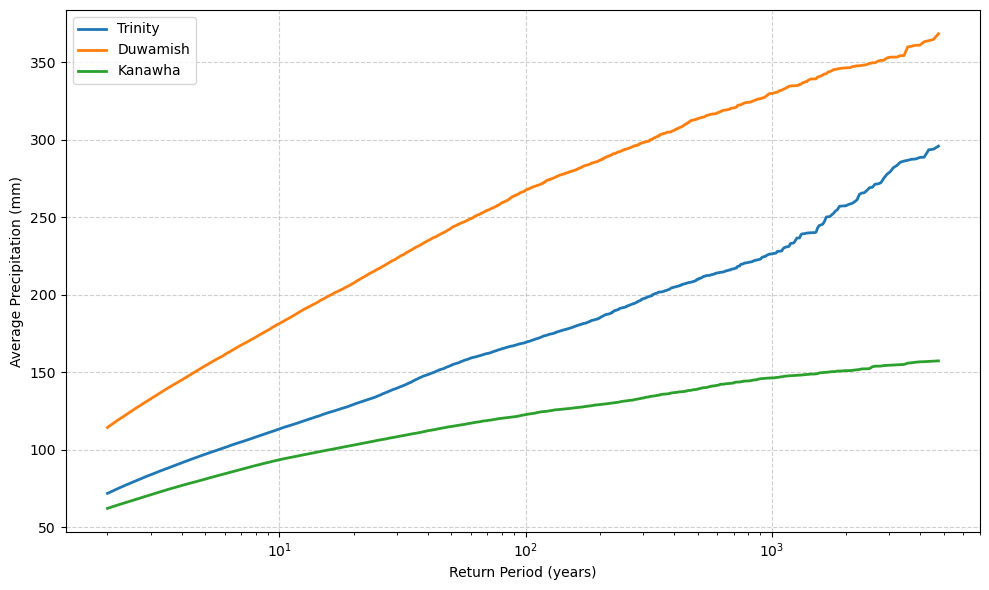

In [ ]:
# Filter each DataFrame for return periods between 1 and 5000 years
trinity_filtered = trinity_fullmonte_depths[(trinity_fullmonte_depths["return_period"] >= 2) & (trinity_fullmonte_depths["return_period"] <= 5000)]
duwamish_filtered = duwamish_fullmonte_depths[(duwamish_fullmonte_depths["return_period"] >= 2) & (duwamish_fullmonte_depths["return_period"] <= 5000)]
kanawha_filtered = kanawha_fullmonte_depths[(kanawha_fullmonte_depths["return_period"] >= 2) & (kanawha_fullmonte_depths["return_period"] <= 5000)]

# Sort by return period for proper line plotting
trinity_filtered = trinity_filtered.sort_values("return_period")
duwamish_filtered = duwamish_filtered.sort_values("return_period")
kanawha_filtered = kanawha_filtered.sort_values("return_period")

# Plot
plt.figure(figsize=(10, 6))

plt.plot(trinity_filtered["return_period"], trinity_filtered["precip_avg_mm"], label="Trinity", linewidth=2)
plt.plot(duwamish_filtered["return_period"], duwamish_filtered["precip_avg_mm"], label="Duwamish", linewidth=2)
plt.plot(kanawha_filtered["return_period"], kanawha_filtered["precip_avg_mm"], label="Kanawha", linewidth=2)

# Log x-axis for clarity in extreme return periods
plt.xscale("log")

plt.xlabel("Return Period (years)")
plt.ylabel("Average Precipitation (mm)")
plt.title("")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
denton_fullmonte_depths = pd.read_parquet("/workspaces/Importance-Sampling-for-SST/data/1_interim/Denton/denton_fullmonte_depths.pq")

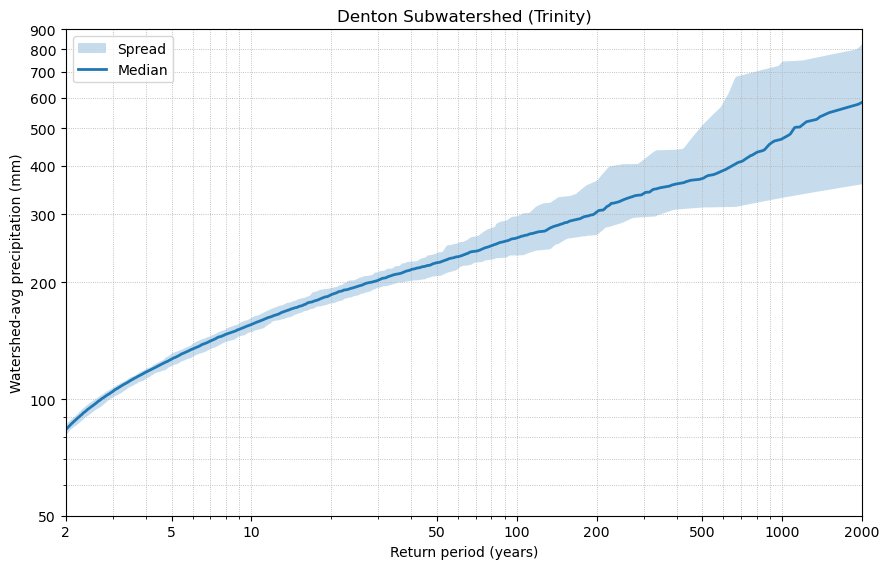

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data
df = denton_fullmonte_depths[['rep','return_period','precip_avg_mm']].dropna().copy()

# RP grid: 2 → max (log spacing; smooth on log-x)
rp_min = 2.0
rp_max = float(np.nanmax(df['return_period']))
rp_max = max(rp_min, rp_max)
rp_grid = np.geomspace(rp_min, rp_max, 600)

def interp_curve(g: pd.DataFrame) -> np.ndarray:
    g = g.sort_values('return_period').drop_duplicates('return_period', keep='last')
    rp = g['return_period'].to_numpy(float)
    depth = g['precip_avg_mm'].to_numpy(float)
    ok = np.isfinite(rp) & np.isfinite(depth) & (rp > 0) & (depth >= 0)
    rp, depth = rp[ok], depth[ok]
    if rp.size < 2:
        return np.full_like(rp_grid, np.nan, dtype=float)
    # interpolate in log-RP space (x is log)
    return np.interp(np.log(rp_grid), np.log(rp), depth, left=np.nan, right=np.nan)

# Build per-rep curves
curves = np.vstack([interp_curve(g) for _, g in df.groupby('rep')])

# Summary stats
median = np.nanmedian(curves, axis=0)
low    = np.nanmin(curves, axis=0)
high   = np.nanmax(curves, axis=0)

# Masks (avoid non-positive on log y)
m_spread = np.isfinite(low) & np.isfinite(high) & (low > 0) & (high > 0)
m_med    = np.isfinite(median) & (median > 0)

# Ticks
xticks_all = np.array([2, 5, 10, 50, 100, 200, 500, 1000, 2000])
xticks = xticks_all[(xticks_all >= rp_min) & (xticks_all <= rp_max)]

ymax = float(np.nanmax(high[m_spread])) if np.any(m_spread) else 100.0
ymax = max(ymax, 50.0)
ymax_rounded = int(np.ceil(ymax/100.0)*100) if ymax >= 100 else int(np.ceil(ymax))
yticks = [50] + list(range(100, ymax_rounded + 1, 100)) if ymax >= 100 else [50, ymax_rounded]

# Plot
fig, ax = plt.subplots(figsize=(9, 5.8))
ax.fill_between(rp_grid[m_spread], low[m_spread], high[m_spread], alpha=0.25, label='Spread')
ax.plot(rp_grid[m_med], median[m_med], linewidth=2.0, label='Median')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(rp_min, rp_max)
ax.set_ylim(50, ymax)      
ax.autoscale(enable=False, axis='y')

ax.set_xticks(xticks)
ax.set_xticklabels([str(int(t)) for t in xticks])
ax.set_yticks(yticks)
ax.set_yticklabels([str(int(t)) for t in yticks])

ax.set_xlabel('Return period (years)')
ax.set_ylabel('Watershed-avg precipitation (mm)')
ax.set_title('Denton Subwatershed (Trinity)')
ax.grid(True, which='both', linestyle=':', linewidth=0.6)
ax.legend()
fig.tight_layout()
plt.show()
